In [2]:
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import Adam
from keras.layers import Dropout

In [3]:
(Xtrain, ytrain), (Xtest, ytest) = fashion_mnist.load_data()

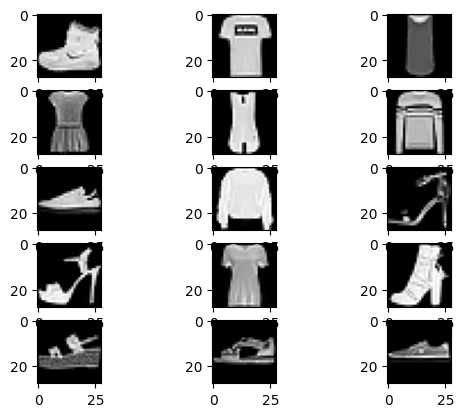

In [4]:
for i in range(15):
    # define subplot
    plt.subplot(5, 3, 1+i)
    # plot raw pixel data
    plt.imshow(Xtrain[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [5]:
def model():
    model = tf.keras.Sequential()
    model.add(Conv2D(32, (5,5), activation = 'relu', input_shape=(28, 28, 1))) #(24, 24, 32)
    model.add(MaxPooling2D((2,2), padding = 'valid')) # (12, 12, 32)
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (5,5), activation = 'relu', input_shape = (12, 12, 32))) #(8, 8, 128)
    model.add(MaxPooling2D((2,2), padding = 'valid')) #(4, 4, 128)
    model.add(Dropout(0.2))
    model.add(Flatten()) #(2048)
    model.add(Dense(512, activation ='relu'))
    return model

In [6]:
def extract_feats(model, data):
    data = data.reshape((data.shape[0], 28, 28, 1))
    features = model.predict(data)
    return features 

In [7]:
def related_idx_fashion(img, features, model):
    img = img.reshape(1,28,28,1)
    in_img = model.predict(img)
    cosine_loss = tf.keras.losses.CosineSimilarity(axis=1)
    similar_idx = [ 1 + cosine_loss(in_img, feat.reshape(1,-1)).numpy() for feat in features ]
    idx_closest = sorted(range(len(similar_idx)), key=lambda k: similar_idx[k])[1:11]
    return idx_closest

In [8]:
def plot_related_fashion(data, idx):
    for temp, i in enumerate(idx):
        plt.subplot(5, 2, 1+temp)
        plt.axis("off")
        plt.imshow(data[i], cmap=plt.get_cmap('gray'))
    plt.show()

In [9]:
def getNumOfImg(minlen, maxlen ):
    print(f"Input id of images from {minlen} to {maxlen}")
    flag = True
    while flag:
        try:
            num = int(input("Enter an integer number: "))
            if (num >= minlen) and (num <= maxlen):
                flag = False
            else:
                print("Out of range")
        except ValueError:
            print("Please input integer only...")  
            continue
    return int(num)

In [10]:
def plot_img(img):
    plt.axis("off")
    plt.imshow(img, cmap=plt.get_cmap('gray'))
    plt.show()

In [11]:
#run q2
ex = model()
feats = extract_feats(ex, Xtrain)

1875/1875 [==============================] - 8s 4ms/step


Input id of images from 0 to 9999
Enter an integer number: 80


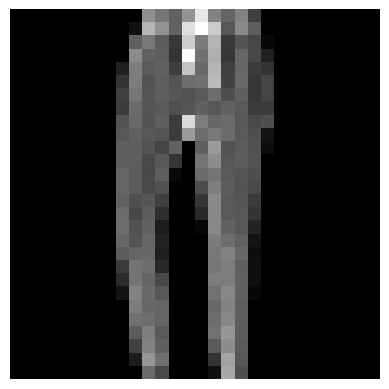

In [12]:
idx_img = getNumOfImg(0, Xtest.shape[0]-1)
plot_img(Xtest[idx_img])

1/1 [==============================] - 0s 51ms/step


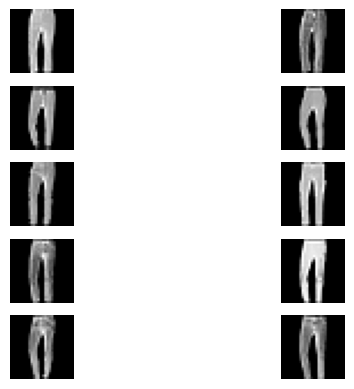

In [13]:
related_idx = related_idx_fashion(Xtest[idx_img], feats, ex)
plot_related_fashion(Xtrain, related_idx)

Input id of images from 0 to 9999
Enter an integer number: 7000


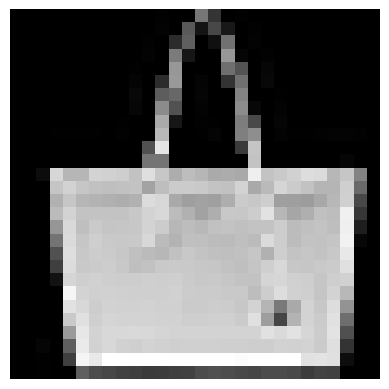

In [16]:
idx_img = getNumOfImg(0, Xtest.shape[0]-1)
plot_img(Xtest[idx_img])

1/1 [==============================] - 0s 19ms/step


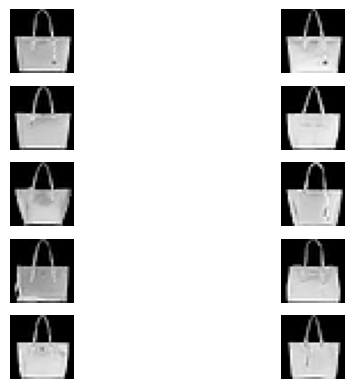

In [17]:
related_idx = related_idx_fashion(Xtest[idx_img], feats, ex)
plot_related_fashion(Xtrain, related_idx)